# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd# импортируем библиотеку pandas
import matplotlib.pyplot as plt# импортируем библиотеку matplotlib  
import pylab as pl# импортируем библиотеку pylab 
import warnings# импортируем библиотеку warnings

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')# прочитаем csv-файл

In [3]:
data.head(20)# выводим первые 20 строк датафрейма data на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()# выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

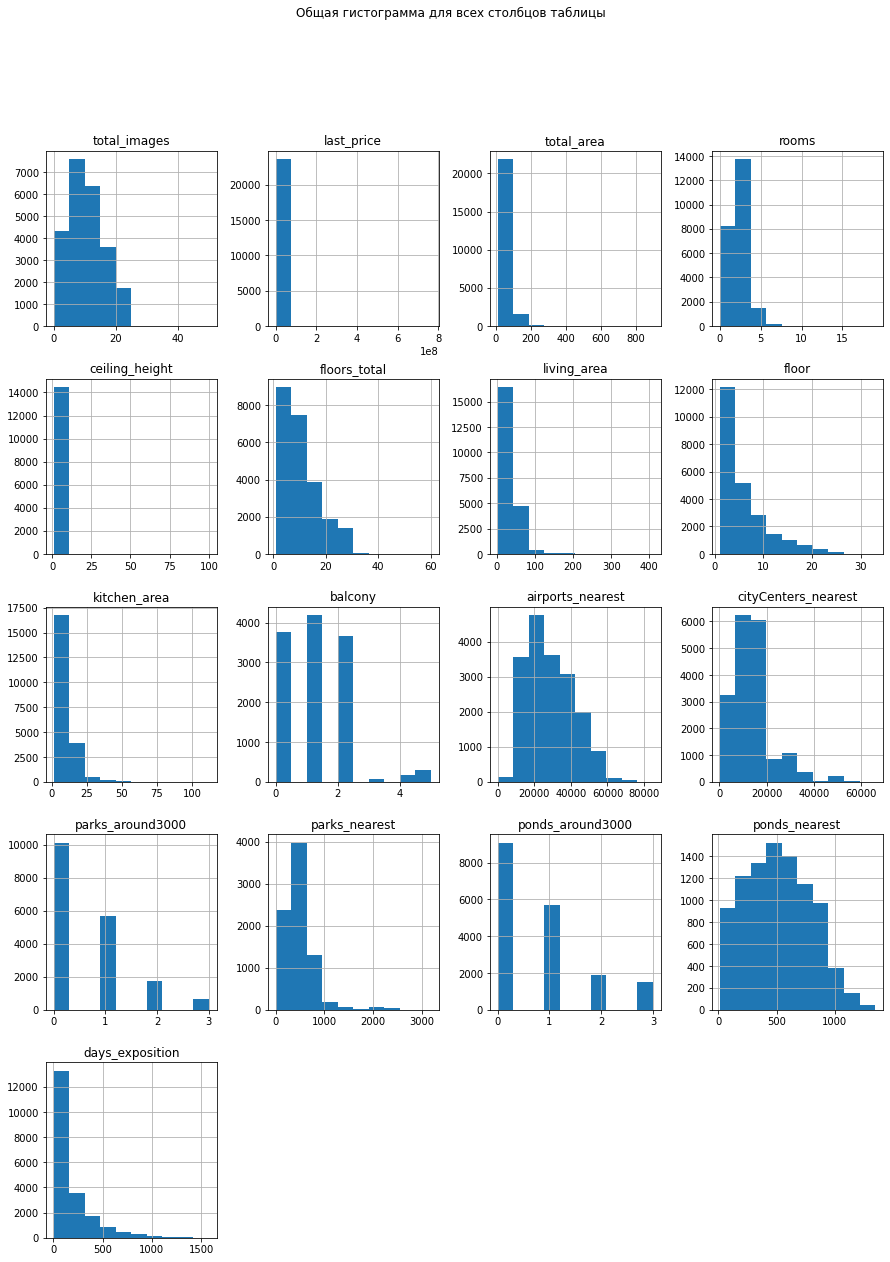

In [5]:
data.hist(figsize=(15,20))# построим общую гистограмму для всех столбцов таблицы
pl.suptitle('Общая гистограмма для всех столбцов таблицы');

Вывод: Мы получили информацию о датафрейме. Датафрейм имеет 23699 строк и 22 столбца. В нем есть пропущенные значения, которые необходимо будет обработать. Также необходимо будет переименовать столбцы cityCenters_nearest, parks_around3000, ponds_around3000. Общая гистограмма показывает нам частоту значений таблицы. Каждая гистограмма наполнена большим количеством значений. Можно приступать к предобработке данных.

### Предобработка данных

In [6]:
data.columns# выводим имена столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# переименовываем столбцы
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest',
                              'parks_around3000':'parks_around_3000',
                              'ponds_around3000':'ponds_around_3000'
                             }
)

In [8]:
#напишем цикл, чтобы вывести описательную характеристику каждого столбца
for row in data:
    display(data[row].describe())

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [9]:
data['ceiling_height'].sort_values().unique()# выводим уникальные значения столбца ceiling_height

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [10]:
#устраним редкие и выбивающиеся значения в столбце ceiling_height
data['ceiling_height'] = data['ceiling_height'].replace({
                                                         24.:2.4,
                                                         25.:2.5,
                                                         26.:2.6,
                                                         27.:2.7,
                                                         27.5:2.75,
                                                         32.:3.2
                                                        }
)

In [11]:
data['ceiling_height']=data['ceiling_height'].replace(list(data.query('ceiling_height<2.4 or ceiling_height>6')['ceiling_height']), None)

In [12]:
data['floors_total'].sort_values().unique()# выводим уникальные значения столбца floors_total

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [13]:
data['floors_total']=data['floors_total'].replace([52,60],None)# устраним редкие и выбивающиеся значения в столбце floors_total

In [14]:
data.query('living_area<10')['living_area'].sort_values().unique()# выводим уникальные значения столбца living_area

array([2. , 3. , 5. , 5.4, 6. , 6.5, 8. , 8.3, 8.4, 8.5, 8.9, 9. , 9.1,
       9.8])

In [15]:
data['living_area']=data['living_area'].replace(list(data.query('living_area<6')['living_area']),None)# устраним редкие и выбивающиеся значения в столбце living_area

In [16]:
data['last_price'].sort_values().unique()# выводим уникальные значения столбца last_price

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [17]:
data['last_price']=data['last_price'].replace(12190,None)# устраним редкие и выбивающиеся значения в столбце last_price

In [18]:
data['kitchen_area'].sort_values().unique()# выводим уникальные значения столбца kitchen_area

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [19]:
data['kitchen_area']=data['kitchen_area'].replace(list(data.query('kitchen_area<5')['kitchen_area']),None)# устраним редкие и выбивающиеся значения в столбце kitchen_area

In [20]:
data['locality_name'].sort_values().unique()# выводим уникальные значения столбца locality_name

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [21]:
# устраним неявные дубликаты в столбце locality_name
data['locality_name'] = data['locality_name'].str.replace('ё','е')\
                                             .str.replace('поселок станции','поселок')\
                                             .str.replace('поселок городского типа','поселок')\
                                             .str.replace('поселок при железнодорожной станции','поселок')\
                                             .str.replace('городской поселок','поселок')

In [22]:
data.isna().sum()# выведем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9205
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2286
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [23]:
data['is_apartment']=data['is_apartment'].fillna(False)# заполним пропуски в столбцах датафрейма

In [24]:
data['balcony']=data['balcony'].fillna(0)

In [25]:
data['days_exposition']=data['days_exposition'].fillna(0)

In [26]:
parks_group=data.groupby('parks_nearest')['parks_around_3000']
for i in parks_group:
    data[data['parks_nearest'].isna()]=data[data['parks_nearest'].isna()].fillna({'parks_around_3000':0})  

In [27]:
ponds_group=data.groupby('ponds_nearest')['ponds_around_3000']
for i in ponds_group:
    data[data['ponds_nearest'].isna()]=data[data['ponds_nearest'].isna()].fillna({'ponds_around_3000':0})

In [28]:
data = data.dropna(subset=['floors_total'])

In [29]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

Выше мы заполнили пропуски в столбцах:
1. is_apartment, balcony - можно заполнить нулями, так как отсутствие данных в этих столбцах может означать, что квартира не является апартаментами или в ней нет балконов.
2. days_exposition - можно заполнить нулями, и это будет означать, что квартира все еще продается.
3. parks_around_3000 - заполняем нулями, сравнивая со столбцом "расстояние до ближайшего парка", если в столбце пусто, парков, скорее всего, поблизости нет. 
4. ponds_around_3000 - заполняем нулями, сравнивая со столбцом "расстояние до ближайшего водоема", если в столбце пусто, водоемов, скорее всего, поблизости нет. 
5. floors_total, locality_name - можно удалить эти строки с пропусками, пропусков не так много, на данные это особо не повлияет.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14471 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21335 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [31]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9094
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2230
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [32]:
for row in data:
    display(data[row].describe())

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

count    2.356500e+04
mean     6.540355e+06
std      1.091085e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

count                   23565
unique                   1489
top       2018-02-01T00:00:00
freq                      366
Name: first_day_exposition, dtype: object

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    14471.000000
mean         2.727172
std          0.277662
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

count    23565.000000
mean        10.672523
std          6.581707
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

count    21700.000000
mean        34.461786
std         22.040184
min          6.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

count     23565
unique        2
top       False
freq      23515
Name: is_apartment, dtype: object

count     23565
unique        2
top       False
freq      23419
Name: studio, dtype: object

count     23565
unique        2
top       False
freq      23498
Name: open_plan, dtype: object

count    21335.000000
mean        10.595011
std          5.894390
min          5.000000
25%          7.000000
50%          9.200000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    23565.000000
mean         0.593677
std          0.960660
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

count               23565
unique                319
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

count    23565.000000
mean         0.468831
std          0.748403
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

count    23565.000000
mean         0.589900
std          0.883966
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [33]:
# преобразуем тип данных в выбранных столбцах.
data=data.astype(
    {
        'floors_total':int, 
        'balcony':int,
        'parks_around_3000':int,
        'ponds_around_3000':int,
        'days_exposition':int
    }
)

Тип данных в указанных столбцах нужно поменять, потому что значениями этих колонок будут являться целые числа.

In [34]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

А в этом столбце тип данных нужно поменять, для того, чтобы в расчетах можно было обратиться к единицам времени. Также данные приобретают красивый вид.

Вывод: Мы провели предобработку данных. Переименовали столбцы, где это потребовалось, устранили редкие и выдающиеся значения, избавились от неявных дубликтов, некоторых пропусков, сравнили информацию о датафрейме до очистки и после. Пропусков стало меньше. Остальные пропуски удалить не получится, так как пропадет много данных, которые анализировать будет некорректно, и заменить их чем-то сложно. Данные пригодны для дальнейшего анализа, так как строк удалено не так много. В описательной характеристике тоже все в порядке после очистки. Причинами пропусков могли быть:
1. Человеческий фактор;
2. Техническая ошибка;
3. Отсутствие данных.
 
Также мы преобразовали тип данных в некоторых столбцах.

### Посчитайте и добавьте в таблицу новые столбцы

In [35]:
data['price_square_meter']=data['last_price']/data['total_area']# добавим новый столбец с ценой одного квадратного метра квартиры

In [36]:
data['weekday_exposition']=data['first_day_exposition'].dt.weekday# добавим столбец со днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [37]:
data['month_exposition']=data['first_day_exposition'].dt.month# добавим столбец с месяцем публикации объявления

In [38]:
data['year_exposition']=data['first_day_exposition'].dt.year# добавим столбец с годом публикации объявления

In [39]:
# напишем функцию, которая будет возвращать категорию этажа, на котором находится квартира
def get_floor (row):
    floor=row['floor']
    floors_total=row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [40]:
data['floor_category']=data.apply(get_floor, axis=1)# применим функцию методом apply()

In [41]:
data['city_centers_nearest_km']=round(data[data['city_centers_nearest']!='NaN']['city_centers_nearest']/1000).astype('Int64')# добавим столбец c расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений)

### Проведите исследовательский анализ данных

#### Исследование параметров объектов

In [42]:
data['total_area'].describe()# исследование общей площади

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

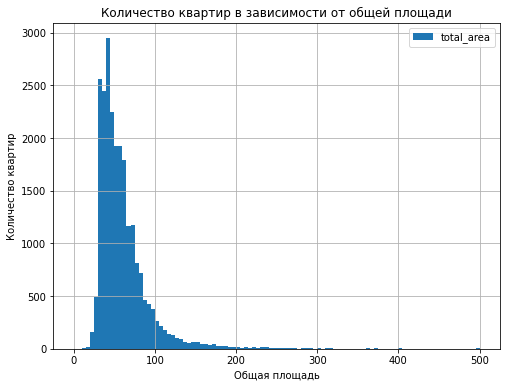

In [43]:
ax = data.plot(kind='hist', y='total_area', range=(0,500), grid=True, bins=100, figsize=(8,6))
ax.set_title('Количество квартир в зависимости от общей площади')
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Количество квартир');

In [44]:
data['last_price'].describe()# исследование цены объекта

count    2.356500e+04
mean     6.540355e+06
std      1.091085e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

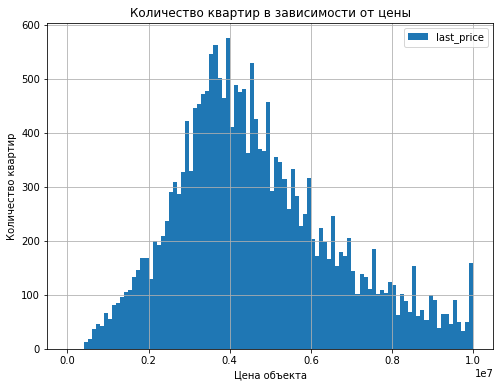

In [45]:
ax = data.plot(kind='hist', y='last_price', range=(0,10000000), grid=True, bins=100, figsize=(8,6))
ax.set_title('Количество квартир в зависимости от цены')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Количество квартир');

In [46]:
data['rooms'].describe()# исследование числа комнат

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

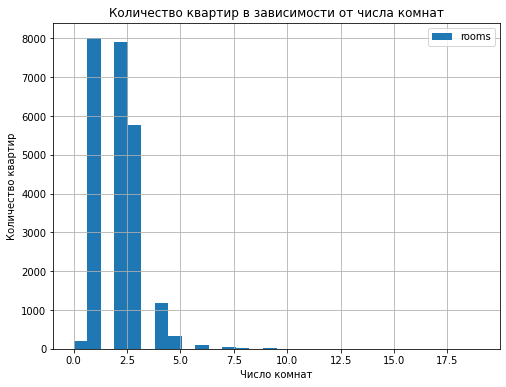

In [47]:
ax = data.plot(kind='hist', y='rooms', range=(0,19), grid=True, bins=30, figsize=(8,6))
ax.set_title('Количество квартир в зависимости от числа комнат')
ax.set_xlabel('Число комнат')
ax.set_ylabel('Количество квартир');

In [48]:
data['ceiling_height'].describe()# исследование высоты потолков

count    14471.000000
mean         2.727172
std          0.277662
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

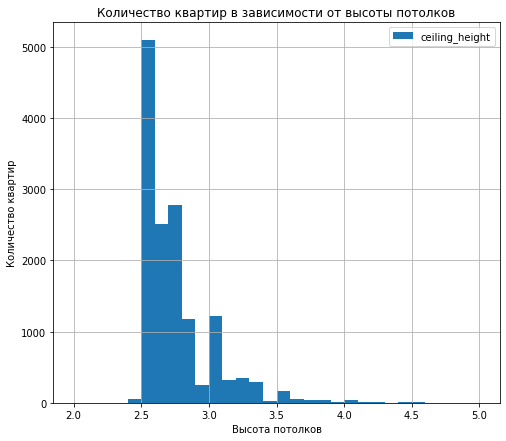

In [49]:
ax = data.plot(kind='hist', y='ceiling_height', range=(2,5), grid=True, bins=30, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от высоты потолков')
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество квартир');

In [50]:
data['living_area'].describe()# исследование жилой площади

count    21700.000000
mean        34.461786
std         22.040184
min          6.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

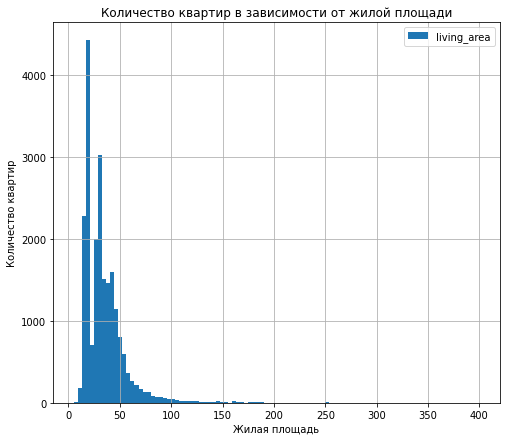

In [51]:
ax = data.plot(kind='hist', y='living_area', range=(5,400), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от жилой площади')
ax.set_xlabel('Жилая площадь')
ax.set_ylabel('Количество квартир');

In [52]:
data['kitchen_area'].describe()# исследование площади кухни

count    21335.000000
mean        10.595011
std          5.894390
min          5.000000
25%          7.000000
50%          9.200000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

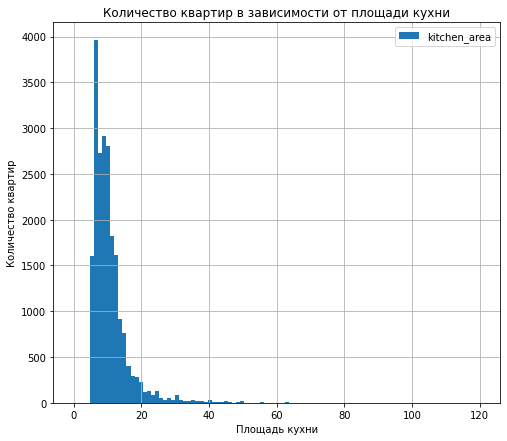

In [53]:
ax = data.plot(kind='hist', y='kitchen_area', range=(0,120), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от площади кухни')
ax.set_xlabel('Площадь кухни')
ax.set_ylabel('Количество квартир');

In [54]:
data['floor'].describe()# исследование этажа квартиры

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

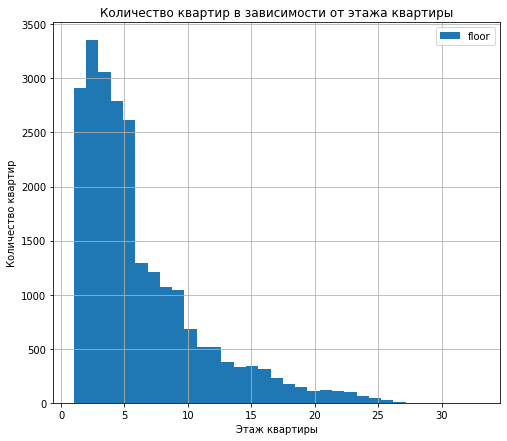

In [55]:
ax = data.plot(kind='hist', y='floor', grid=True, bins=33, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от этажа квартиры')
ax.set_xlabel('Этаж квартиры')
ax.set_ylabel('Количество квартир');

In [56]:
data['floor_category'].describe()# исследование типа этажа квартиры

count      23565
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

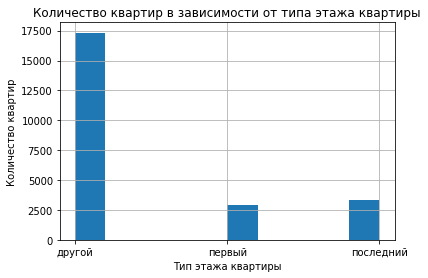

In [57]:
ax = data['floor_category'].hist()
ax.set_title('Количество квартир в зависимости от типа этажа квартиры')
ax.set_xlabel('Тип этажа квартиры')
ax.set_ylabel('Количество квартир');

In [58]:
data['floors_total'].describe()# исследование общего количества этажей в доме

count    23565.000000
mean        10.672523
std          6.581707
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

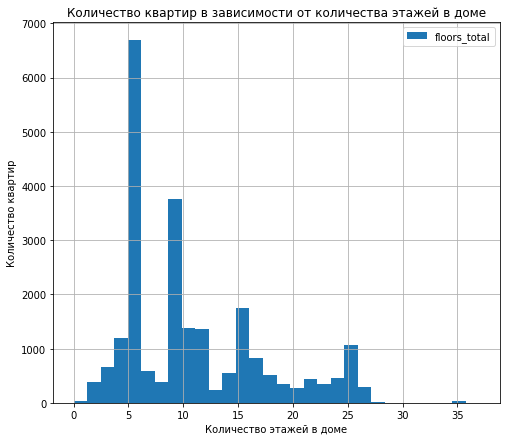

In [59]:
ax = data.plot(kind='hist', y='floors_total', range=(0,37), grid=True, bins=30, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от количества этажей в доме')
ax.set_xlabel('Количество этажей в доме')
ax.set_ylabel('Количество квартир');

In [60]:
data['city_centers_nearest'].describe()# исследование расстояния до центра города в метрах

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

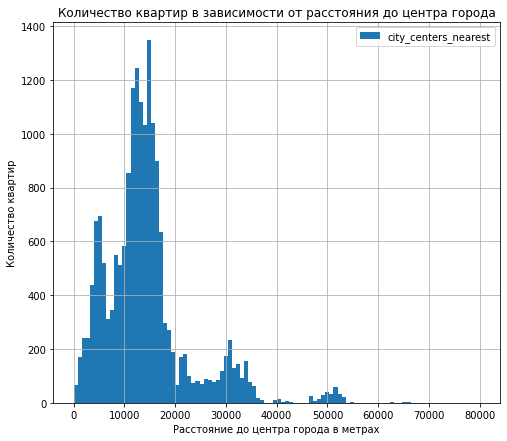

In [61]:
ax = data.plot(kind='hist', y='city_centers_nearest', range=(0,80000), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от расстояния до центра города')
ax.set_xlabel('Расстояние до центра города в метрах')
ax.set_ylabel('Количество квартир');

In [62]:
data['airports_nearest'].describe()# исследование расстояния до ближайшего аэропорта

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

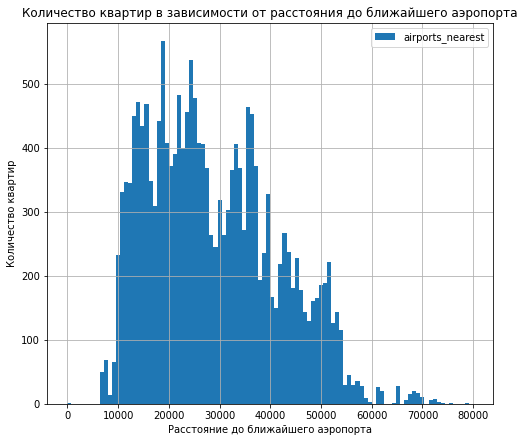

In [63]:
ax = data.plot(kind='hist', y='airports_nearest', range=(0,80000), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от расстояния до ближайшего аэропорта')
ax.set_xlabel('Расстояние до ближайшего аэропорта')
ax.set_ylabel('Количество квартир');

In [64]:
data['parks_nearest'].describe()# исследование расстояния до ближайшего парка

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

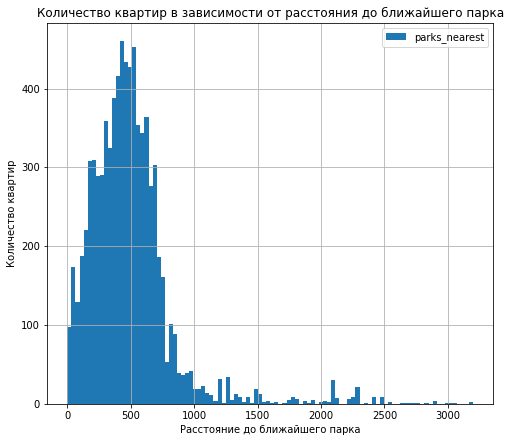

In [65]:
ax = data.plot(kind='hist', y='parks_nearest', range=(0,3200), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество квартир в зависимости от расстояния до ближайшего парка')
ax.set_xlabel('Расстояние до ближайшего парка')
ax.set_ylabel('Количество квартир');

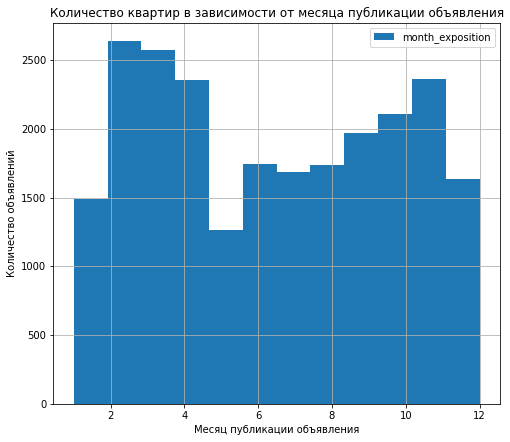

In [66]:
ax = data.plot(kind='hist', y='month_exposition', range=(1,12), grid=True, bins=12, figsize=(8,7))# исследование месяца публикации объявления
ax.set_title('Количество квартир в зависимости от месяца публикации объявления')
ax.set_xlabel('Месяц публикации объявления')
ax.set_ylabel('Количество объявлений');

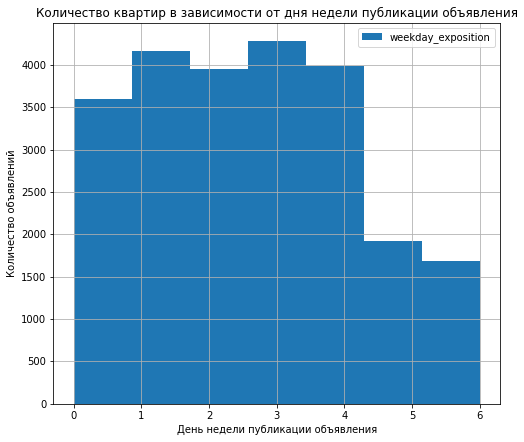

In [67]:
ax = data.plot(kind='hist', y='weekday_exposition', range=(0,6), grid=True, bins=7, figsize=(8,7))# исследование дня недели публикации объявления
ax.set_title('Количество квартир в зависимости от дня недели публикации объявления')
ax.set_xlabel('День недели публикации объявления')
ax.set_ylabel('Количество объявлений');

Вывод: Просмотрев гистограммы и список характерных значений, можно сказать, что с данными практически все в порядке, на некоторых гистограммах есть выбросы. В списке характерных значений имеется повышенное стандартное отклонение. Но это не сильно влияет на данные.  

Площади квартир колеблются от 12 до 900 кв.метров. Среднее значение равно 60 кв.метров. Цена на рынке недвижимости варьируется от 430 тыс.рублей до 7,6 млрд. рублей. Средняя цена на квартиры - 6,5 млн. рублей. Однокомнатных квартир больше всего, а двухкомнатных немного меньше, чем однокомнатных, но они самые популярные. Средняя высота потолков 2,7 кв.метров. Среднее значение жилой площади 34,5 кв метров, минимальное - 6 кв.метров, а максимальное - 409 кв.метров. Средняя площадь кухни 10,5 кв. метров. Самая высокая квартира в объявлениях находится на 33 этаже. А самый высокий дом, в котором продается квартира, состоит из 37 этажей. Меньше всего продается квартир на первом этаже, далее продаются на последнем, и больше всего продается между первым и последним. Самая близкая к центру квартира располагается в 181 метре от него. Также есть квартиры рядом с парком или аэропортом. Чаще всего объявления о продаже квартир появляются весной и осенью. А также объявления чаще выкладывают по будням, нежели по выходным.

#### Исследование количества времени для продажи квартиры

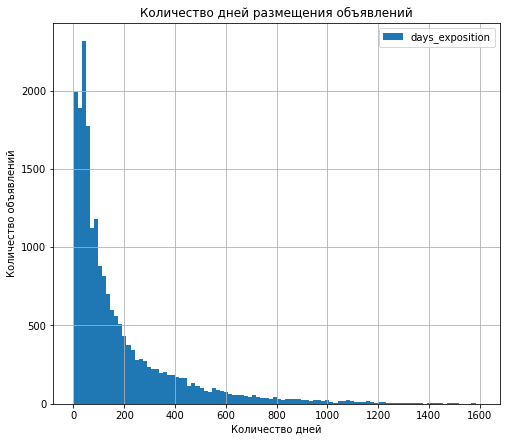

In [68]:
# построим график, отображающий зависимость цены объекта от общей площади
ax = data.query('days_exposition!=0').plot(kind='hist', y='days_exposition', range=(1,1600), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество дней размещения объявлений')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество объявлений');

In [69]:
data['days_exposition'].mean()# найдем среднее количество дней размещения объявлений

156.42011457670273

In [70]:
data['days_exposition'].median()# найдем медиану количества дней размещения объявлений

73.0

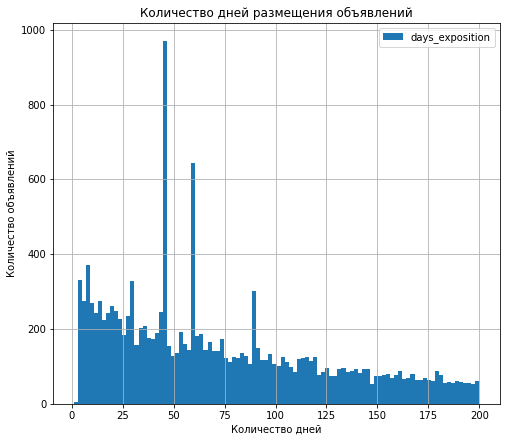

In [71]:
# увеличим гистограмму
ax = data.query('days_exposition!=0').plot(kind='hist', y='days_exposition', range=(1,200), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество дней размещения объявлений')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество объявлений');

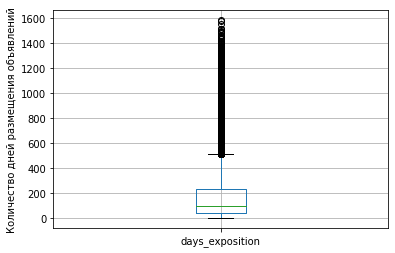

In [72]:
# построим диаграмму размаха
ax = data.query('days_exposition!=0').boxplot('days_exposition') 
ax.set_ylabel('Количество дней размещения объявлений');

In [73]:
data.query('days_exposition!=0')['days_exposition'].describe()# получим описательную характеристику столбца days_exposition

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [74]:
data['days_exposition'].value_counts().head(10)# выведем дни, когда больше всего было снято объявлений с продажи

0     3171
45     879
60     538
7      234
30     208
90     200
4      174
3      157
5      152
14     147
Name: days_exposition, dtype: int64

In [75]:
data_clean=data[~data['days_exposition'].isin([0,7,30,45,60,90])]# очистим датафрейм от выбросов и запишем его в новую переменную

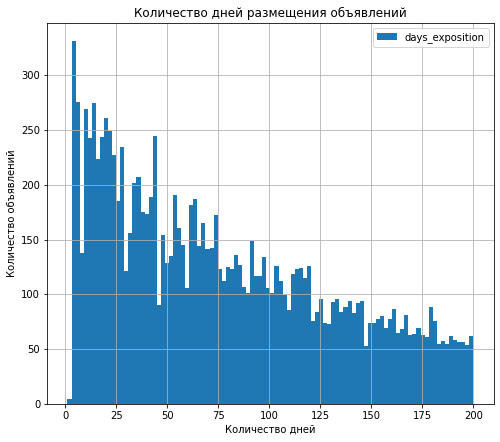

In [76]:
# проверим, как изменилась гистограмма после очистки
ax = data_clean.plot(kind='hist', y='days_exposition', range=(1,200), grid=True, bins=100, figsize=(8,7))
ax.set_title('Количество дней размещения объявлений')
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество объявлений');

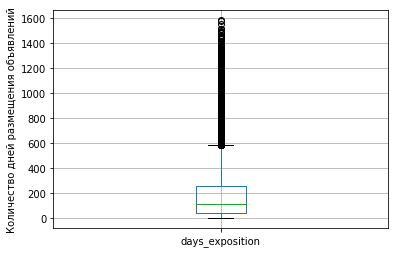

In [77]:
# снова построим диаграмму размаха
ax = data_clean.boxplot('days_exposition') 
ax.set_ylabel('Количество дней размещения объявлений');

Вывод: 
По первым графикам можно сказать, что быстрыми продажи являлись до 500 дней, а медленными от 500 дней и выше. Среднее значение времени для продажи квартиры - 160 дней. А медиана - 79 дней. По такому отклонению стало заметно, что скорее всего есть какие-то выбросы в данных. Построили диаграмму размаха, увеличили гистограмму, обнаружилось, что больше всего снятых объявлений через 7,30,45,60,90 дней. Об этом стоит уточнить у человека, предоставившего нам данные, почему так могло произойти. Избавившись от аномалий мы получили быстрые продажи до 600 дней, а медленные от 600 дней и выше.

#### Исследование влияющих факторов на общую (полную) стоимость объекта

Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

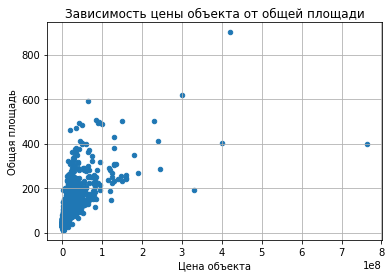

In [78]:
# построим график, отображающий зависимость цены объекта от общей площади
ax = data_clean.plot(x='last_price',y='total_area',grid=True,kind='scatter')
ax.set_title('Зависимость цены объекта от общей площади')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Общая площадь');

In [79]:
# рассчитаем корреляцию
data_clean['total_area'].corr(data_clean['last_price'])

0.6434191407278936

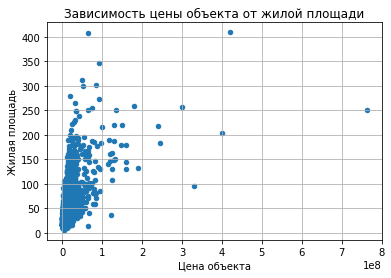

In [80]:
# построим график, отображающий зависимость цены объекта от жилой площади
ax = data_clean.plot(x='last_price',y='living_area',grid=True,kind='scatter')
ax.set_title('Зависимость цены объекта от жилой площади')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Жилая площадь');

In [81]:
# рассчитаем корреляцию
data_clean['living_area'].corr(data_clean['last_price'])

0.5595453046623705

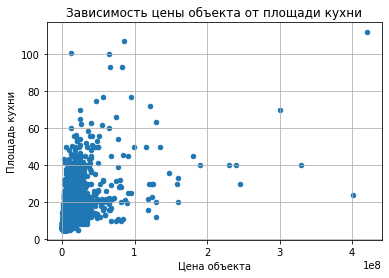

In [82]:
# построим график, отображающий зависимость цены объекта от площади кухни
ax = data_clean.plot(x='last_price',y='kitchen_area',grid=True,kind='scatter')
ax.set_title('Зависимость цены объекта от площади кухни')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Площадь кухни');

In [83]:
# рассчитаем корреляцию
data_clean['kitchen_area'].corr(data_clean['last_price'])

0.5112865543503748

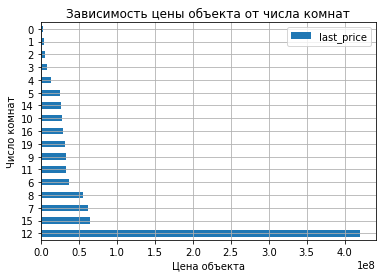

In [84]:
# построим график, отображающий зависимость цены объекта от числа комнат
ax = data_clean.pivot_table(index='rooms', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).plot(y='last_price',grid=True,kind='barh')
ax.set_title('Зависимость цены объекта от числа комнат')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Число комнат');

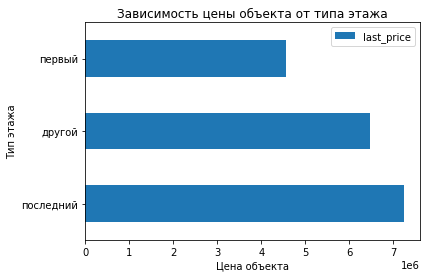

In [85]:
# построим график, отображающий зависимость цены объекта от типа этажа
ax = data_clean.pivot_table(index='floor_category', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).plot(y='last_price',kind='barh')
ax.set_title('Зависимость цены объекта от типа этажа')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Тип этажа');

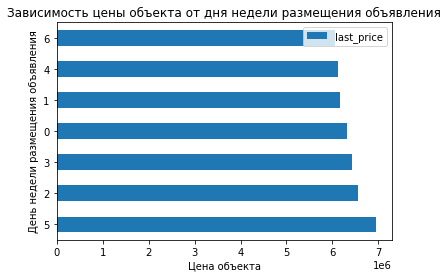

In [86]:
# построим график, отображающий зависимость цены объекта от дня недели размещения объявления
ax = data_clean.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).plot(y='last_price',kind='barh')
ax.set_title('Зависимость цены объекта от дня недели размещения объявления')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('День недели размещения объявления');

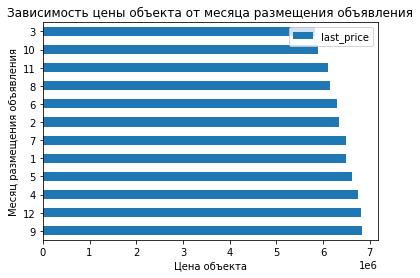

In [87]:
# построим график, отображающий зависимость цены объекта от месяца размещения объявления
ax = data_clean.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).plot(y='last_price',kind='barh')
ax.set_title('Зависимость цены объекта от месяца размещения объявления')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Месяц размещения объявления');

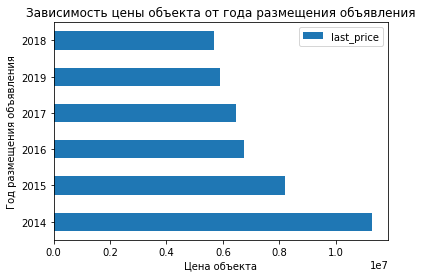

In [88]:
# построим график, отображающий зависимость цены объекта от года размещения объявления
ax = data_clean.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending=False).plot(y='last_price',kind='barh')
ax.set_title('Зависимость цены объекта от года размещения объявления')
ax.set_xlabel('Цена объекта')
ax.set_ylabel('Год размещения объявления');

Вывод: По графикам и рассчитанной корреляции можно сказать, что больше всего на стоимость квартиры влияют несколько факторов:
1. Общая площадь, где корреляция составила 0,65;
2. Количество комнат. На графике стоимость увеличивается с увеличением числа комнат;
3. Этаж. Дешевле всего стоят квартиры на 1 этаже, дороже - на последнем.

Площадь кухни и жилая площадь тоже влияют на стоимость квартиры, но не сильно. Их корреляция составила 0.51 и 0.56 соответственно. День недели, месяц и год размещения объявления так же не оказывают особого влияния на стоимость.

#### Определение населённых пунктов с самой высокой и низкой стоимостью квадратного метра

In [89]:
top_location=data_clean.pivot_table(index = 'locality_name', values = 'total_area', aggfunc ='count').sort_values('total_area',ascending = False).head(10)# найдем 10 населённых пунктах с наибольшим числом объявлений

In [90]:
# посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
locations_agg=data_clean[data_clean['locality_name'].isin(top_location.index)]\
                                        .pivot_table(index='locality_name',values='price_square_meter',aggfunc=['mean','min','max'])\
                                        .sort_values(by=('mean','price_square_meter'),ascending = False)

In [91]:
# посмотрим на средние, минимальные, максимальные цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locations_agg.columns=['price_square_meter_mean','price_square_meter_min','price_square_meter_max']

In [92]:
locations_agg

,price_square_meter_mean,price_square_meter_min,price_square_meter_max
locality_name,,,
Санкт-Петербург,112380.704575,15345.268542,1.907500e+06
Пушкин,102690.649073,59836.065574,2.565217e+05
деревня Кудрово,92234.338086,54160.346696,1.428571e+05
поселок Парголово,89777.774558,39205.955335,1.385224e+05
поселок Мурино,85529.947704,50000.000000,1.385802e+05
поселок Шушары,78053.349377,47833.333333,1.478261e+05
Колпино,75145.099754,47957.371226,1.250000e+05
Всеволожск,68612.109173,31400.000000,6.404224e+05
Гатчина,67323.267175,10507.246377,1.058182e+05


In [93]:
locations_agg['price_square_meter_min'].min()# выделим самую низкую стоимость квадратного метра

10507.246376811594

С самой низкой стоимостью квадратного метра - город Гатчина.

In [94]:
locations_agg['price_square_meter_max'].max()# выделим самую высокую стоимость квадратного метра

1907500.0

С самой высокой стоимостью квадратного метра - город Санкт-Петербург.

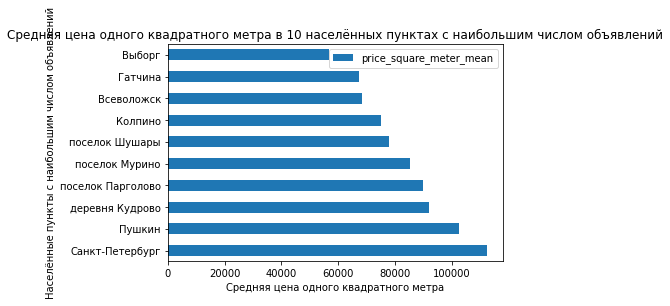

In [95]:
# отобразим данные на столбчатой диаграмме
ax = locations_agg.plot(y='price_square_meter_mean',kind='barh')
ax.set_title('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
ax.set_xlabel('Cредняя цена одного квадратного метра')
ax.set_ylabel('Населённые пункты с наибольшим числом объявлений');

Вывод: Нашли среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Из них с самой низкой стоимостью одного квадратного метра квартиры оказался город Выборг, а с самой высокой стоимостью - город Санкт-Петербург.

#### Исследование зависимости стоимости объектов от расстояния до центра города

In [96]:
query_city=data_clean.query('locality_name=="Санкт-Петербург"')# выберем строки с датафрейма только с городом Санкт-Петербург

In [97]:
warnings.filterwarnings("ignore")

query_city['price_kilometer']=data_clean['last_price']/data_clean['city_centers_nearest_km'].replace(0,1)# добавим столбец, в котором вычислим цену каждого километра

In [98]:
pivot=query_city.pivot_table(index='city_centers_nearest_km', values=['price_kilometer', 'last_price'], aggfunc='mean').sort_values('price_kilometer',ascending=False)# создадим сводную таблицу, в которой вычислим среднюю цену каждого километра

In [99]:
pivot

,last_price,price_kilometer
city_centers_nearest_km,,
0,3.162126e+07,31621257.111111
1,1.940168e+07,19401679.732026
2,1.760848e+07,8804240.595745
3,1.037017e+07,3456723.638778
4,1.346526e+07,3366314.537124
5,1.389447e+07,2778893.87619
6,1.494549e+07,2490915.042988
7,1.411754e+07,2016791.119643
8,9.557092e+06,1194636.48471


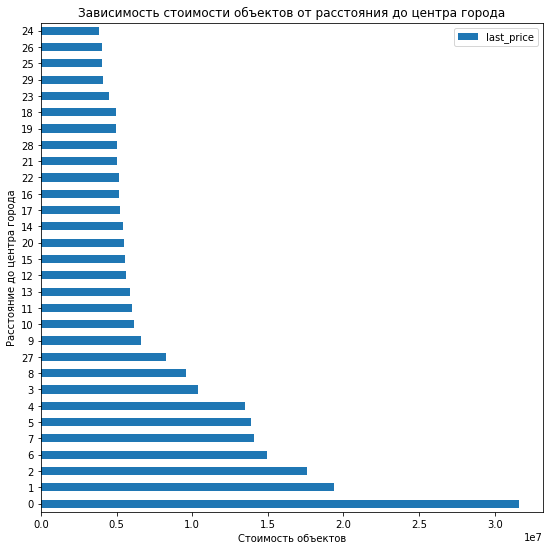

In [100]:
# построим график, отображающий зависимость стоимости объектов от расстояния до центра города
ax = query_city.pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc='mean').sort_values('last_price',ascending=False).plot(y='last_price',kind='barh', figsize=(9,9),)
ax.set_title('Зависимость стоимости объектов от расстояния до центра города')
ax.set_xlabel('Cтоимость объектов')
ax.set_ylabel('Расстояние до центра города');

Вывод: По проведенному исследованию оказалось, что стоимость объектов будет выше, если квартиру брать ближе к центру, и ниже, если брать квартиру дальше от центра. 

### Общий вывод

По проведенному исследованию архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах сервиса Яндекс Недвижимость мы выяснили, что:

1. Площадь квартир была в пределах 12-900 кв.метров;
2. Цена на рынке недвижимости варьировалась от 430 тыс.рублей до 7,6 млрд. рублей;
3. Однокомнатных квартир в продаже было больше всего, однако двухкомнатные не менее популярны;
4. Среднее значение жилой площади и площади кухни равно 34,5 и 10,5 кв. метров соответственно;
5. Самый высокий этаж, на котором располагалась квартира - 33, а самый высокий дом, в котором продавалась квартира - 37-этажный;
6. Меньше всего продавалось квартир на первом этаже;
7. Были квартиры в центре, рядом с парком или рядом с аэропортом;
8. Чаще всего объявления о продаже квартир появлялись весной и осенью. А также объявления чаще выкладывали по будням, нежели по выходным.

Также мы изучили время продаж квартир и стоимость квадратного метра. Выяснилось, что быстрые продажи осуществлялись в периоде 600 дней после начала продажи, а медленные от 600 дней и выше. С самой низкой стоимостью одного квадратного метра квартиры из 10 населённых пунктов с наибольшим числом объявлений оказался город Выборг, а с самой высокой стоимостью - город Санкт-Петербург.

Затем в исследовании проанализировали, как на стоимость квартиры влияли некоторые факторы. Больше всего оказывали влияние:

1. Общая площадь;
2. Количество комнат;
3. Этаж;
4. Расстояние до центра города.